In [12]:
import pickle
import joblib
import os
import pandas as pd

In [5]:
with open('mat/mat_data.pkl', 'rb') as f:
    mat_data = pickle.load(f)

with open('tot/tot_data.pkl', 'rb') as f:
    tot_data = pickle.load(f)

In [13]:
mat_y = mat_data['y_pred_eval']
tot_y = tot_data['y_pred_eval']
T = pd.read_csv('../data/prec/df_eval.csv')['temperature']

In [15]:
pred_prop = ['seebeck', 'cond_elec', 'cond_therm']

In [33]:
from sklearn.metrics import r2_score

In [22]:
mat_df = pd.DataFrame()
mat_df['temperature'] = T
mat_df['seebeck'] = mat_y[0]
mat_df['cond_elec'] = mat_y[1]
mat_df['cond_therm'] = mat_y[2]
mat_df['zT'] = (mat_y[0]**2 * mat_y[1] * T) / (mat_y[2])
mat_df.to_csv('mat/mat_eval.csv', index=False)


In [23]:
tot_df = pd.DataFrame()
tot_df['temperature'] = T
tot_df['seebeck'] = tot_y[0]
tot_df['cond_elec'] = tot_y[1]
tot_df['cond_therm'] = tot_y[2]
tot_df['zT'] = (tot_y[0]**2 * tot_y[1] * T) / (tot_y[2])
tot_df.to_csv('tot/tot_eval.csv', index=False)


In [24]:
true_zT = pd.read_csv('../data/prec/df_eval.csv')['zT']
mat_zT = mat_df['zT']
tot_zT = tot_df['zT']


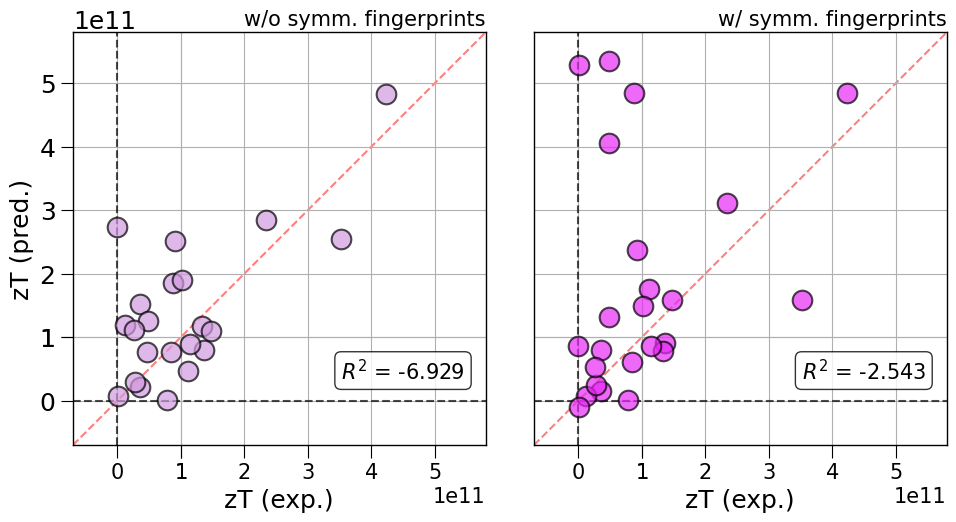

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True, sharex=False)
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['ytick.major.size'] = 9
ticks = [0, 1e11, 1e11, 2e11, 3e11, 4e11, 5e11]
plt.setp(ax, xticks=ticks)
plt.setp(ax, yticks=ticks)
lim_1 = [-0.7*1e11, 5.8*1e11]
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlelocation'] = 'right'
plt.rcParams['axes.titlepad'] = 5

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 18
r20 = r2_score(true_zT, mat_zT)

ax[0].set_xlim(lim_1)
ax[0].set_ylim(lim_1)
ax[0].scatter(true_zT, mat_zT, alpha=0.7, s=200, color='#d19adf',edgecolor='k', linewidth=1.5, zorder=3)
ax[0].plot(lim_1, lim_1, 'r--', alpha=0.5, zorder=1)
ax[0].axhline(0, linestyle='--', color='k',lw=1.5, alpha=0.7)
ax[0].axvline(0, color='k', linestyle='--', lw=1.5, alpha=0.7)
ax[0].set_xlabel('zT (exp.)')
ax[0].set_ylabel('zT (pred.)')

ax[0].set_title('w/o symm. fingerprints', loc='right')

ax[0].grid(True)
ax[0].set_box_aspect(1)
ax[0].text(0.95, 0.15, f'$R^2$ = {r20:.3f}', transform=ax[0].transAxes, fontsize=15,
        verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

r21 = r2_score(true_zT, tot_zT)

ax[1].tick_params(which='both', left=False, right=False,)

ax[1].set_xlim(lim_1)
ax[1].set_ylim(lim_1)
ax[1].plot(lim_1, lim_1, 'r--', alpha=0.5, zorder=1)
ax[1].scatter(true_zT, tot_zT,s=200, edgecolor='k', color='#e829f6',linewidth=1.5, alpha=0.7, zorder=3)
ax[1].set_xlabel('zT (exp.)')
ax[1].set_title('w/ symm. fingerprints', loc='right')
ax[1].axhline(0, linestyle='--', color='k',lw=1.5, alpha=0.7)
ax[1].axvline(0, color='k', linestyle='--', lw=1.5, alpha=0.7)
ax[1].grid(True)
ax[1].text(0.95, 0.15, f'$R^2$ = {r21:.3f}', transform=ax[1].transAxes, fontsize=15,
        verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax[1].set_box_aspect(1)

plt.tight_layout()
plt.savefig('model_zT_comparison.png', dpi=300)